# FordGoBike_Part2
## by Emuejevoke Eshemitan

## Investigation Overview


For this presentation, we would be visualising plots that shows the follwoing insights
- People tends to ride more frequently during the weekdays than weekends
- Majority of the people riding the bikes are Male
- Customers takes longer rides compared to subscribers
- Irrespective of the gender, the durations taper off as a person gets older. 

## Dataset Overview

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area for the month of February 2019. For this project, the data was made available by Udacity with this link [dataset](https://video.udacity-data.com/topher/2020/October/5f91cf38_201902-fordgobike-tripdata/201902-fordgobike-tripdata.csv)

**Note:The dataset used for the presentation is the dataset created after cleaning which structured to have 174,952 observations with 20 features.**

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
df_clean = pd.read_csv('clean_data.csv')
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min,member_age,start_day,start_hour
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,869.750000,35,Thursday,17
1,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No,1030.900000,47,Thursday,12
2,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No,608.166667,30,Thursday,17
3,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes,26.416667,45,Thursday,23
4,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No,29.883333,60,Thursday,23


## Ride Frequency per Day of the Week

> This helps to visualize the first key inisght: "People tends to ride more frequently during the weekdays than weekends"

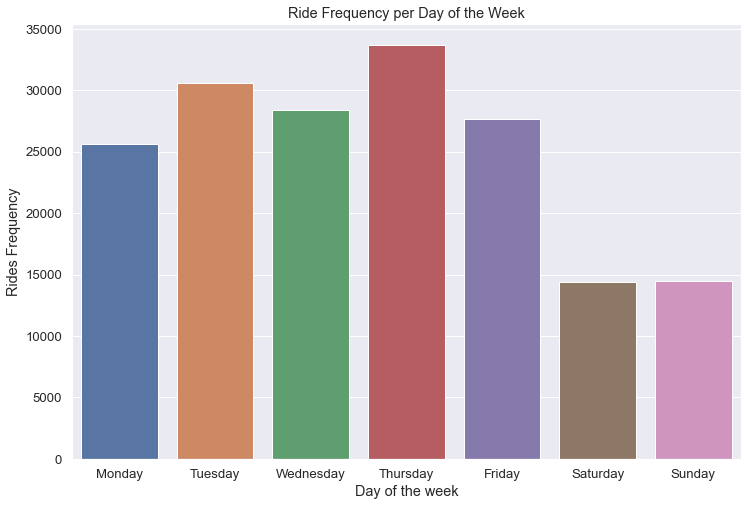

In [3]:
sns.set(font_scale = 1.2)
plt.figure(figsize=(12, 8))
day_order = ['Monday','Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(data = df_clean, x = 'start_day', order = day_order)

plt.title('Ride Frequency per Day of the Week')
plt.ylabel('Rides Frequency')
plt.xlabel('Day of the week')
plt.show()

## Number of Bike Riders per Gender

> This helps to visualize the 2nd key inisght: "Majority of the people riding the bikes are Male"

Text(0, 0.5, 'Number of riders')

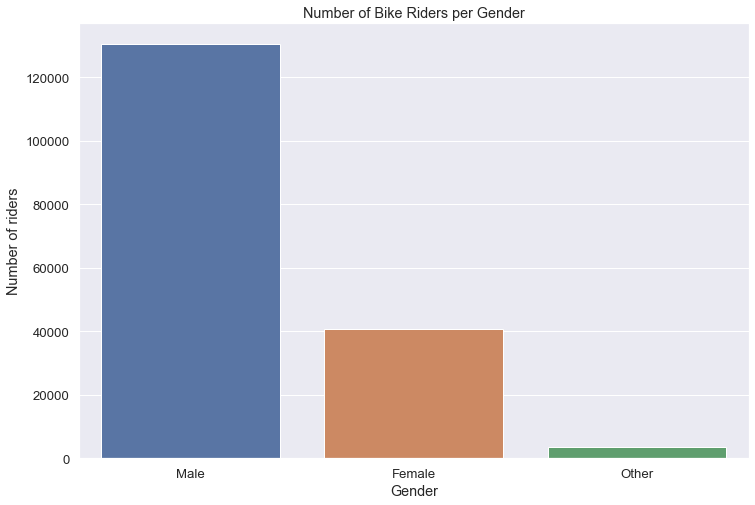

In [4]:
plt.figure(figsize=(12, 8))
df_gender = df_clean['member_gender'].value_counts().index
sns.countplot(data = df_clean, x = 'member_gender', order = df_gender)
plt.title('Number of Bike Riders per Gender')
plt.xlabel('Gender')
plt.ylabel('Number of riders')

## Ride Duration of Customers and Subscribers

> This helps to visualize the 3rd key inisght: "Customers takes longer rides compared to subscribers"

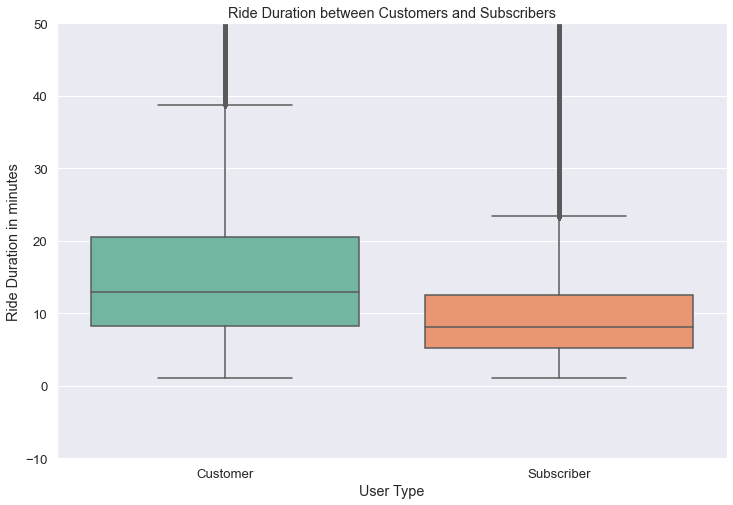

In [5]:
# set figure size
plt.figure(figsize=(12, 8))

sns.boxplot(x='user_type', y='duration_min', data = df_clean, palette ='Set2')
plt.ylim(-10, 50)
plt.title('Ride Duration between Customers and Subscribers')
plt.xlabel('User Type')
plt.ylabel('Ride Duration in minutes')
plt.show()

## Ride Duration Across Ages and Genders

> This helps to visualize the 4th key inisght: "Irrespective of the gender, the durations taper off as a person gets older."

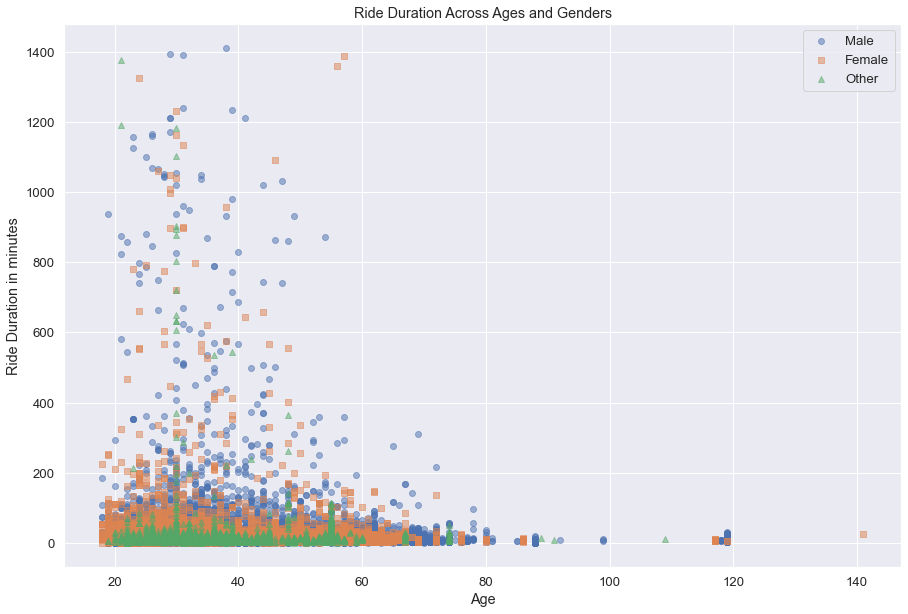

In [6]:
plt.figure(figsize = (15,10))

cat_markers = [['Male', 'o'],
               ['Female', 's'],
               ['Other', '^']]

for cat, marker in cat_markers:
    df_gender = df_clean[df_clean['member_gender'] == cat]
    plt.scatter(data = df_gender, x = 'member_age', y = 'duration_min', marker = marker, alpha = 0.5);
plt.legend(['Male', 'Female', 'Other']);

plt.title('Ride Duration Across Ages and Genders');
plt.xlabel('Age');
plt.ylabel('Ride Duration in minutes');

In [ ]:
!jupyter nbconvert FordGoBike_Part2.ipynb --to slides --post serve --no-input --no-prompt